In [4]:
import pandas as pd
import numpy as np

from scipy.stats import norm
import time

import matplotlib.pyplot as plt

### 10 Assets

In [5]:
mu = 0.01
sigma = 0.10
bars = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (bars, num_assets))

In [6]:
returns

array([[-0.08727928, -0.1725045 , -0.05658426, ..., -0.04520088,
         0.05423069,  0.2636946 ],
       [-0.02256428,  0.01020891, -0.07664523, ...,  0.06201659,
        -0.10716439, -0.06176425],
       [-0.04945595, -0.1420124 ,  0.06630462, ..., -0.22998576,
         0.09427169,  0.06127986],
       ..., 
       [-0.01693338, -0.0242776 , -0.00753656, ...,  0.07217899,
         0.02064304,  0.09080637],
       [ 0.1082336 ,  0.00520505,  0.15384422, ..., -0.14614178,
         0.12670971, -0.04430107],
       [-0.07163484,  0.07908666, -0.12907129, ...,  0.0735814 ,
        -0.09084232, -0.00475873]])

In [7]:
names = ['Asset %s' %i for i in range(num_assets)]

In [8]:
returns = pd.DataFrame(returns, columns=names)

In [9]:
returns

,Asset 0,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9
0,-0.087279,-0.172505,-0.056584,0.036576,-0.024155,-0.030636,0.067804,-0.045201,0.054231,0.263695
1,-0.022564,0.010209,-0.076645,0.088240,-0.019992,-0.095168,-0.086051,0.062017,-0.107164,-0.061764
2,-0.049456,-0.142012,0.066305,-0.063624,-0.028525,0.006492,0.014029,-0.229986,0.094272,0.061280
3,0.114352,0.037954,0.132188,0.046020,-0.043716,-0.030887,0.168149,0.073798,0.065360,-0.020022
4,0.071798,-0.128355,0.054188,0.025354,0.145070,0.152803,0.045666,0.014068,-0.001001,-0.199177
5,0.050148,-0.045947,-0.005232,-0.037250,0.035048,-0.177255,-0.009464,0.016512,0.159302,-0.025188
6,0.137756,0.178748,-0.052897,0.163550,0.004948,0.059831,0.107487,0.006086,-0.144889,-0.165090
7,-0.064236,-0.063332,0.057131,-0.021796,0.067176,-0.063442,-0.026334,-0.070254,-0.106730,0.101994
8,0.269812,-0.143711,-0.105168,-0.132077,0.095294,0.190671,-0.005739,-0.088524,-0.079388,-0.176132
9,-0.176639,-0.087610,-0.052740,0.042751,0.055775,0.130531,-0.082674,0.074601,-0.134867,-0.064200


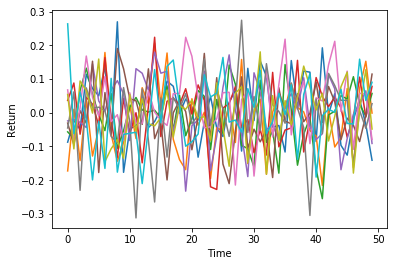

In [10]:
plt.plot(returns.head(50))
plt.xlabel('Time')
plt.ylabel('Return');
plt.show()

In [11]:
weights = np.ones((10,1))

In [12]:
weights = weights / np.sum(weights)

In [13]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [14]:
value_invested = 1000000

In [15]:
value_at_risk(value_invested, returns, weights, alpha=0.95)

-43510.360407618609

In [16]:
returns.iloc[-520:].dot(weights)

,0
480,0.027495
481,0.001873
482,-0.009539
483,0.014565
484,-0.016498
485,0.022782
486,0.033857
487,0.012352
488,0.051119
489,0.051251


In [17]:
portfolio_std = np.sqrt( np.power(sigma, 2) * num_assets ) / num_assets

In [18]:
portfolio_std

0.031622776601683791

In [19]:
(mu - portfolio_std * norm.ppf(0.95)) * value_invested

-42014.838787555738

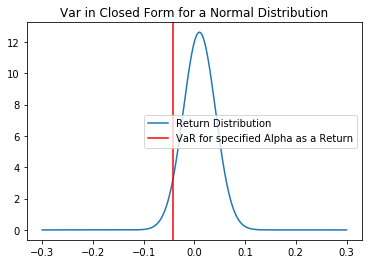

In [21]:
def value_at_risk_N(mu=0, sigma=1.0, alpha=0.95):
    return mu - sigma*norm.ppf(alpha)

x = np.linspace(-3*sigma, 3*sigma, 1000)
y = norm.pdf(x, loc=mu, scale=portfolio_std)
plt.plot(x,y);
plt.axvline(value_at_risk_N(mu = 0.01, sigma = portfolio_std, alpha=0.95), color='red', linestyle='solid');
plt.legend(['Return Distribution', 'VaR for specified Alpha as a Return'])
plt.title('Var in Closed Form for a Normal Distribution');
plt.show()

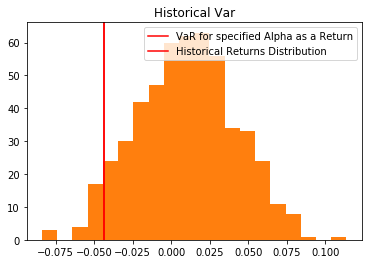

In [23]:
lookback_days = 520
alpha = 0.95

portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights, alpha=0.95)
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns, bins = 20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.legend(['VaR for specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical Var')
plt.show()

In [25]:
def cvar(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    var_pct_loss = var / value_invested
    
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

In [26]:
cvar(value_invested, returns, weights, lookback_days=520)

-53387.411193846747